# Redução de Dimensionalidade no MNIST

## Objetivo
Reduzir as 784 features (28x28 pixels) do dataset MNIST para apenas **2 características principais**:

- **Intensidade**  
- **Simetria (vertical + horizontal)**

Essa redução permite trabalhar com modelos de Aprendizado de Máquina mais simples, sem perder informações relevantes para distinguir os dígitos.

---

## Intensidade

A **intensidade** mede a quantidade de pixels escuros na imagem.  
É calculada pela soma dos valores dos pixels dividida por 255:

$$
I = \frac{\sum_{i=0}^{27} \sum_{j=0}^{27} pix_{i,j}}{255}
$$

Quanto maior o valor, mais preenchida a imagem (ex.: dígito 0 tende a ter intensidade maior que o dígito 1).

---

## Simetria

A **simetria** é calculada comparando a imagem com sua reflexão.

### Simetria Vertical (Sv)
Compara pixels da metade esquerda com os da metade direita, linha a linha:

$$
S_v = \frac{\sum_{i=0}^{27} \sum_{j=0}^{13} \left| pix_{i,j} - pix_{i,27-j} \right|}{255}
$$

### Simetria Horizontal (Sh)
Compara pixels da metade superior com os da metade inferior, coluna a coluna:

$$
S_h = \frac{\sum_{i=0}^{13} \sum_{j=0}^{27} \left| pix_{i,j} - pix_{27-i,j} \right|}{255}
$$

### Simetria Total
$$
S = S_v + S_h
$$

- **Quanto mais próximo de 0, mais simétrica a imagem.**
- Valores maiores indicam maior assimetria.

---

## Construção dos Novos Arquivos

Foram gerados novos arquivos CSV contendo apenas as 3 colunas relevantes:

- **label** → o dígito real  
- **intensidade** → nível de preenchimento da imagem  
- **simetria** → medida de quão simétrica é a imagem  

```python
reduzir_dataset('mnist_train.csv', 'train_redu.csv')
reduzir_dataset('mnist_test.csv', 'test_redu.csv')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_train = pd.read_csv('dataset/train.csv', sep=';')
df_test = pd.read_csv('dataset/test.csv', sep=';')

In [19]:
df_train.shape, df_test.shape

((2186, 785), (1115, 785))

In [21]:
print("Treino:")
display(df_train.head())

print("Teste:")
display(df_test.head())

Treino:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Teste:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reduzindo a dimensão das amostras

- Função para calcular intensidade e simetria de cada imagem

In [23]:
def calcular_intensidade_e_simetria(row):
    pixelx = row[1:].values.reshape(28, 28)

    intensidade = pixelx.sum() / 255
    simetria_vertical = np.sum(np.abs(pixelx[:, :14] - pixelx[:, ::-1][:, :14])) / 255
    simetria_horizontal = np.sum(np.abs(pixelx[:14, :] - pixelx[::-1, :][:14, :])) / 255
    simetria_completa = simetria_vertical + simetria_horizontal

    return pd.Series({'intensidade': intensidade, 'simetria': simetria_completa})



- Função para ajustar o tamanho dos datasets

In [28]:
def dados_reduzidos():
    TEST_DATA_PATH = ('dataset/test.csv')
    TRAIN_DATA_PATH = ('dataset/train.csv')
    data_test_df = pd.read_csv(TEST_DATA_PATH, sep=';')
    data_train_df = pd.read_csv(TRAIN_DATA_PATH, sep=';')

    data_train_df[['intensidade', 'simetria']] = data_train_df.apply(calcular_intensidade_e_simetria, axis=1)
    data_test_df[['intensidade', 'simetria']] = data_test_df.apply(calcular_intensidade_e_simetria, axis=1) 

    colunas_relevantes = ['label', 'intensidade', 'simetria']
    TEST_REDU_DATA_PATH = ('dataset/test_redu.csv')
    TRAIN_REDU_DATA_PATH = ('dataset/train_redu.csv')

    data_test_redu_df = data_test_df[colunas_relevantes]
    data_train_redu_df = data_train_df[colunas_relevantes]
    
    return {
        "data_test_redu_df": data_test_redu_df,
        "data_train_redu_df": data_train_redu_df
    }

In [32]:
datasets = dados_reduzidos()

data_test_redu_df = datasets['data_test_redu_df']
data_train_redu_df = datasets['data_train_redu_df']

In [31]:
data_test_redu_df

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


- Disperção dos dados reduzidos

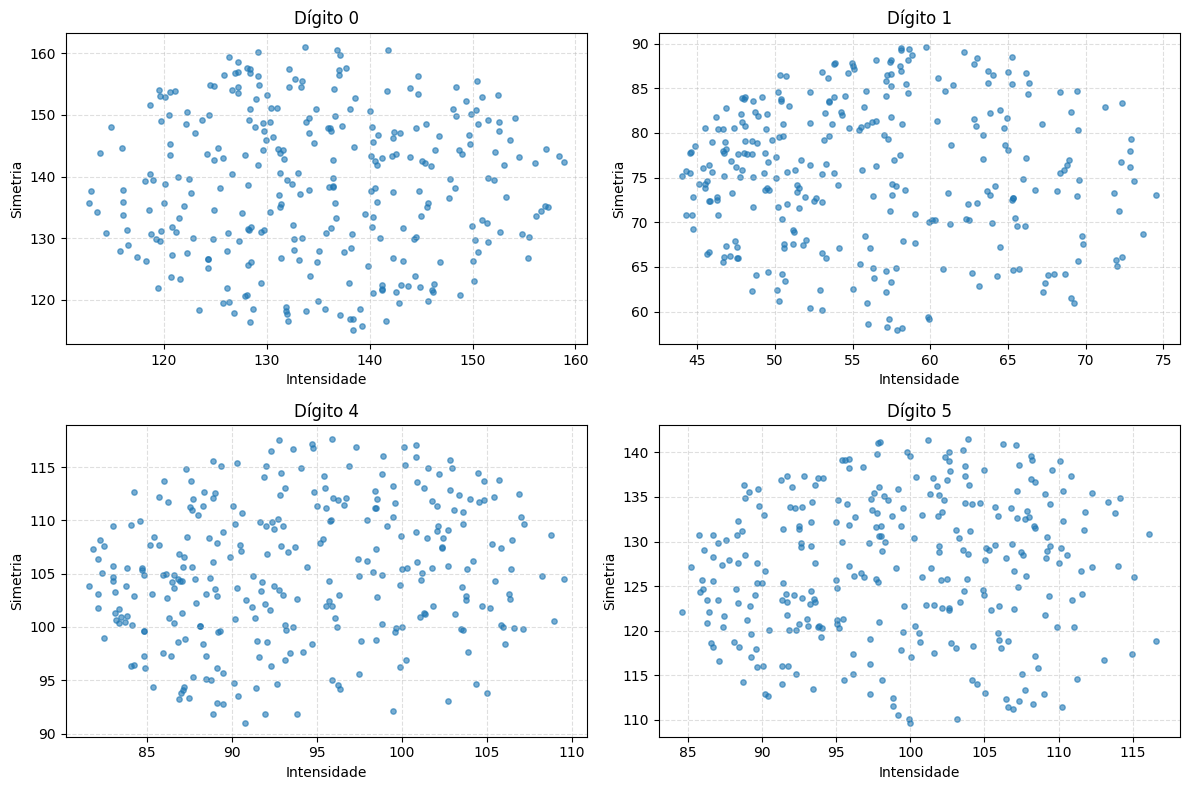

In [34]:
df = data_train_redu_df

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for digito, ax in zip(sorted(df['label'].unique()), axes):
    subset = df[df['label'] == digito].sample(min(300, len(df[df['label'] == digito])), random_state=42)
    
    ax.scatter(subset['intensidade'], subset['simetria'], 
               alpha=0.6, s=15, c="tab:blue")
    
    ax.set_title(f'Dígito {digito}')
    ax.set_xlabel('Intensidade')
    ax.set_ylabel('Simetria')
    ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

- Disperção dos dados reduzidos (todos na mesma escala)

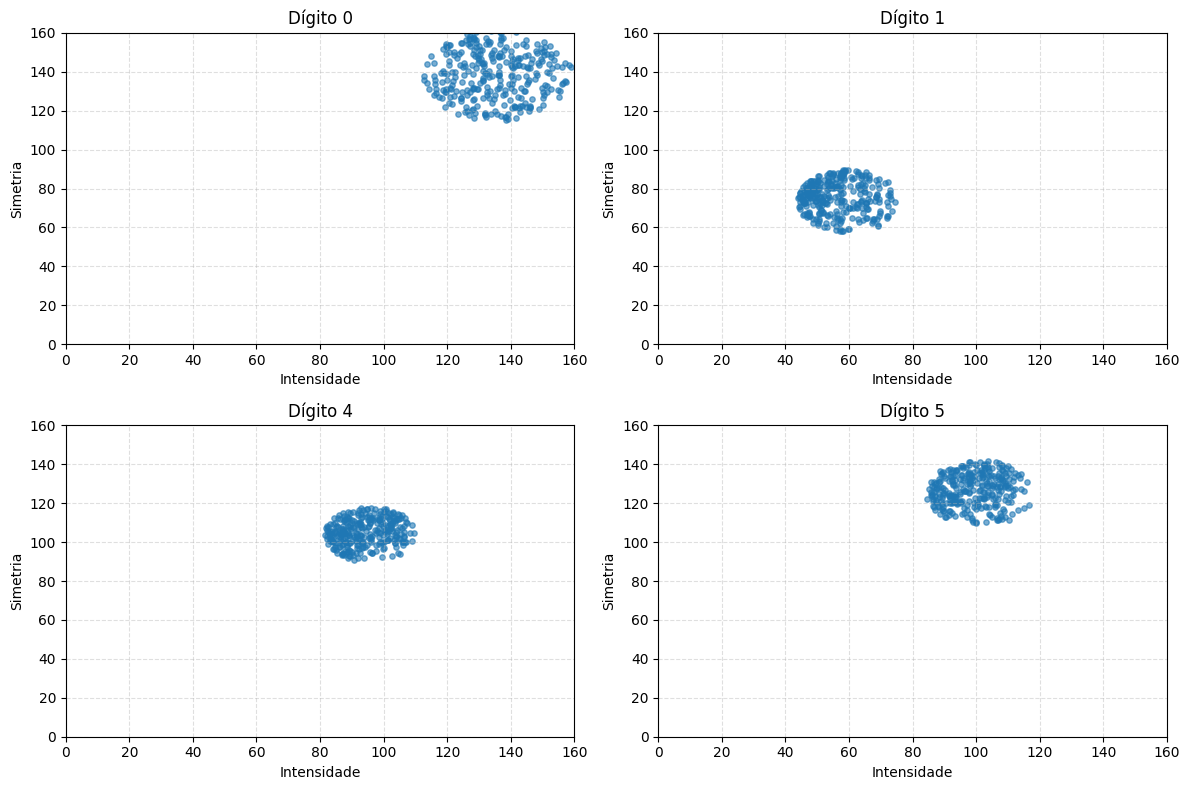

In [33]:
df = data_train_redu_df

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for digito, ax in zip(sorted(df['label'].unique()), axes):
    subset = df[df['label'] == digito].sample(min(300, len(df[df['label'] == digito])), random_state=42)
    
    ax.scatter(subset['intensidade'], subset['simetria'], 
               alpha=0.6, s=15, c="tab:blue")
    
    ax.set_title(f'Dígito {digito}')
    ax.set_xlabel('Intensidade')
    ax.set_ylabel('Simetria')
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlim(0, 160)
    ax.set_ylim(0, 160)

plt.tight_layout()
plt.show()